## Statistics for Data Science with Python


In [5]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


### Task 1: Become familiar with the dataset


In [6]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

In [7]:
print(boston_df.head())

   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV  
0  296.0     15.3   4.98  24.0  
1  242.0     17.8   9.14  21.6  
2  242.0     17.8   4.03  34.7  
3  222.0     18.7   2.94  33.4  
4  222.0     18.7   5.33  36.2  


### Task 2: Generate Descriptive Statistics and Visualizations


#### For the "Median value of owner-occupied homes" provide a boxplot

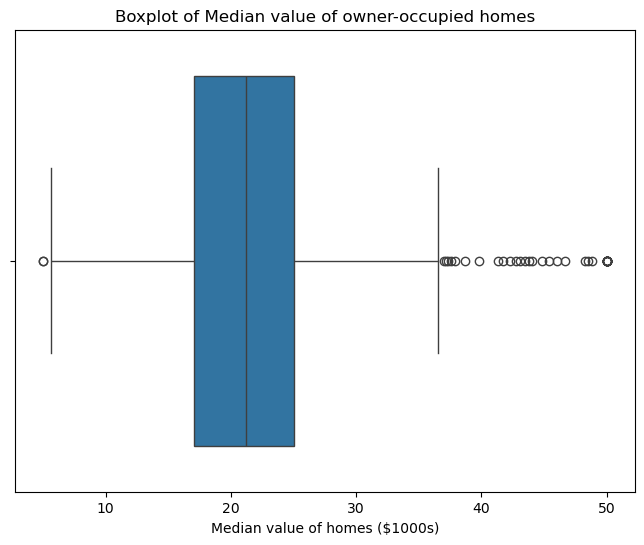


    Interpretation of the Boxplot:
    - Median Value: The median value of owner-occupied homes is $21200.0.
    - Interquartile Range (IQR): The middle 50% of home values range from $17025.0 to $25000.0.
    - Whiskers: The lower whisker extends to $50.0, 
      and the upper whisker extends to $5.0.
    - Outliers: There are 40 outliers in the data. These represent homes with values significantly 
      different from the rest. The outliers have values $5.0 to $50.0.
    - Skewness: The position of the median line within the box can indicate skewness. 
      If the median is closer to the bottom of the box, the data is positively skewed (right-skewed). 
      If the median is closer to the top, the data is negatively skewed (left-skewed).
    


In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=boston_df['MEDV'])
plt.title('Boxplot of Median value of owner-occupied homes')
plt.xlabel('Median value of homes ($1000s)')
plt.show()

# Interpretation
def interpret_boxplot(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    median = np.median(data)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    outliers = data[(data < lower_whisker) | (data > upper_whisker)]
    
    interpretation = f"""
    Interpretation of the Boxplot:
    - Median Value: The median value of owner-occupied homes is ${median*1000}.
    - Interquartile Range (IQR): The middle 50% of home values range from ${Q1*1000} to ${Q3*1000}.
    - Whiskers: The lower whisker extends to ${max(data[data >= lower_whisker])}, 
      and the upper whisker extends to ${min(data[data <= upper_whisker])}.
    - Outliers: There are {len(outliers)} outliers in the data. These represent homes with values significantly 
      different from the rest. The outliers have values ${min(outliers)} to ${max(outliers)}.
    - Skewness: The position of the median line within the box can indicate skewness. 
      If the median is closer to the bottom of the box, the data is positively skewed (right-skewed). 
      If the median is closer to the top, the data is negatively skewed (left-skewed).
    """
    print(interpretation)

# Call the interpretation function
interpret_boxplot(boston_df['MEDV'])


#### Provide a  bar plot for the Charles river variable



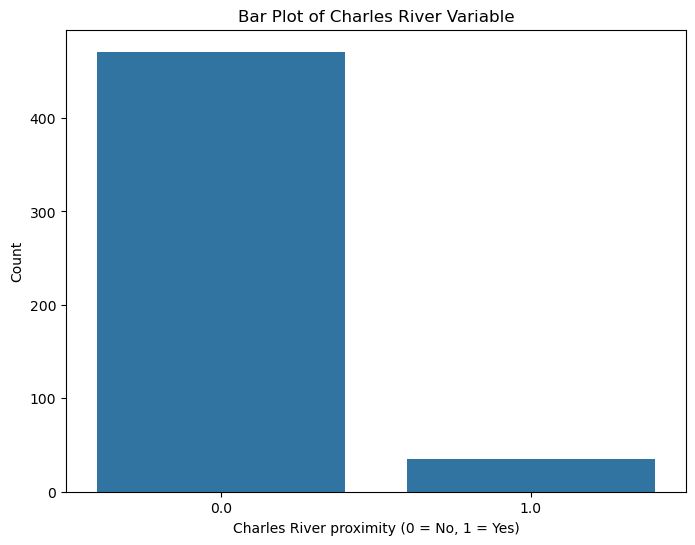


    Interpretation of the Bar Plot:
    - Houses Not Bounded by the Charles River (0): There are 471 houses that are not bounded by the Charles River.
    - Houses Bounded by the Charles River (1): There are 35 houses that are bounded by the Charles River.
    - Distribution: The majority of houses in the dataset are not near the Charles River, as indicated by the higher count for category 0.
    


In [9]:
# Bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='CHAS', data=boston_df)
plt.title('Bar Plot of Charles River Variable')
plt.xlabel('Charles River proximity (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Interpretation of the Bar Plot
def interpret_barplot():
    count_0 = boston_df[boston_df['CHAS'] == 0].shape[0]
    count_1 = boston_df[boston_df['CHAS'] == 1].shape[0]
    
    interpretation = f"""
    Interpretation of the Bar Plot:
    - Houses Not Bounded by the Charles River (0): There are {count_0} houses that are not bounded by the Charles River.
    - Houses Bounded by the Charles River (1): There are {count_1} houses that are bounded by the Charles River.
    - Distribution: The majority of houses in the dataset are not near the Charles River, as indicated by the higher count for category 0.
    """
    print(interpretation)

# Call the interpretation function for the bar plot
interpret_barplot()


#### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)



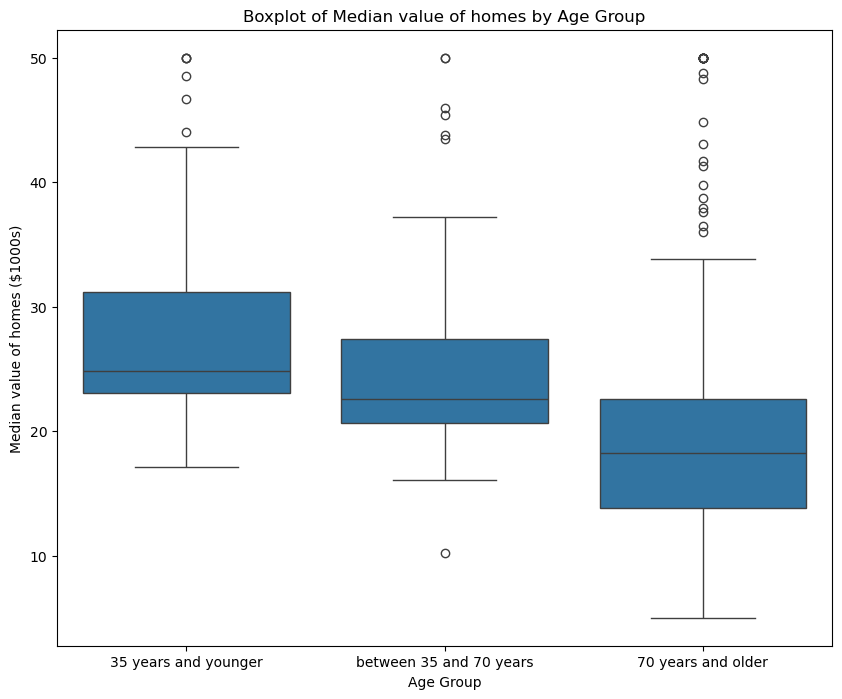


        Interpretation for Age Group 'between 35 and 70 years':
        - Median Value: The median value of homes is $22600.0.
        - Interquartile Range (IQR): The middle 50% of home values range from $20675.0 to $27425.0.
        - Whiskers: The lower whisker extends to $50.0, 
          and the upper whisker extends to $10.2.
        - Outliers: There are 7 outliers in this age group. These represent homes with values significantly 
          different from the rest. The outliers have values $10.2 to $50.0.
        - Skewness: The position of the median line within the box can indicate skewness. 
          If the median is closer to the bottom of the box, the data is positively skewed (right-skewed). 
          If the median is closer to the top, the data is negatively skewed (left-skewed).
        

        Interpretation for Age Group '70 years and older':
        - Median Value: The median value of homes is $18200.0.
        - Interquartile Range (IQR): The middle 50% of home

In [12]:
# Discretize AGE variable
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, boston_df['AGE'].max()],
                                labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])

# Boxplot
plt.figure(figsize=(10, 8))
sns.boxplot(x='AGE_group', y='MEDV', data=boston_df)
plt.title('Boxplot of Median value of homes by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median value of homes ($1000s)')
plt.show()

# Interpretation of the Boxplot
def interpret_age_group_boxplot(data, age_column, value_column):
    age_groups = data[age_column].unique()
    interpretations = []

    for group in age_groups:
        group_data = data[data[age_column] == group][value_column]
        Q1 = np.percentile(group_data, 25)
        Q3 = np.percentile(group_data, 75)
        median = np.median(group_data)
        IQR = Q3 - Q1
        lower_whisker = Q1 - 1.5 * IQR
        upper_whisker = Q3 + 1.5 * IQR
        outliers = group_data[(group_data < lower_whisker) | (group_data > upper_whisker)]
        
        interpretation = f"""
        Interpretation for Age Group '{group}':
        - Median Value: The median value of homes is ${median*1000}.
        - Interquartile Range (IQR): The middle 50% of home values range from ${Q1*1000} to ${Q3*1000}.
        - Whiskers: The lower whisker extends to ${max(group_data[group_data >= lower_whisker])}, 
          and the upper whisker extends to ${min(group_data[group_data <= upper_whisker])}.
        - Outliers: There are {len(outliers)} outliers in this age group. These represent homes with values significantly 
          different from the rest. The outliers have values ${min(outliers)} to ${max(outliers)}.
        - Skewness: The position of the median line within the box can indicate skewness. 
          If the median is closer to the bottom of the box, the data is positively skewed (right-skewed). 
          If the median is closer to the top, the data is negatively skewed (left-skewed).
        """
        interpretations.append(interpretation)
    
    return interpretations

# Call the interpretation function for the boxplot
interpretations = interpret_age_group_boxplot(boston_df, 'AGE_group', 'MEDV')
for interpretation in interpretations:
    print(interpretation)


#### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?



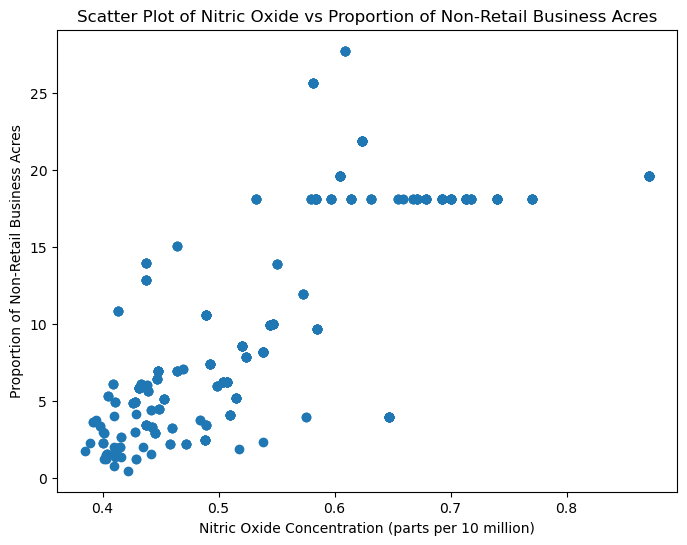


    Interpretation of the Scatter Plot:
    - Relationship: The scatter plot shows the relationship between Nitric Oxide concentration and the proportion of non-retail business acres.
    - Correlation: The Pearson correlation coefficient between these two variables is 0.76.
    - Based on the correlation coefficient, there is a correlation (positive) between Nitric Oxide concentration and the proportion of non-retail business acres.
    - Significance: With a p-value of 7.91e-98, the correlation is considered significant.
    


In [17]:
from scipy.stats import pearsonr

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(boston_df['NOX'], boston_df['INDUS'])
plt.title('Scatter Plot of Nitric Oxide vs Proportion of Non-Retail Business Acres')
plt.xlabel('Nitric Oxide Concentration (parts per 10 million)')
plt.ylabel('Proportion of Non-Retail Business Acres')
plt.show()

# Interpretation of the Scatter Plot
def interpret_scatter_plot(x, y):
    correlation_coefficient, p_value = pearsonr(x, y)
    
    if abs(correlation_coefficient) > 0.3:
        correlation = "a correlation"
        direction = "positive" if correlation_coefficient > 0 else "negative"
    else:
        correlation = "no significant correlation"
        direction = ""
    
    significance = "significant" if p_value < 0.05 else "not significant"

    interpretation = f"""
    Interpretation of the Scatter Plot:
    - Relationship: The scatter plot shows the relationship between Nitric Oxide concentration and the proportion of non-retail business acres.
    - Correlation: The Pearson correlation coefficient between these two variables is {correlation_coefficient:.2f}.
    - Based on the correlation coefficient, there is {correlation} ({direction}) between Nitric Oxide concentration and the proportion of non-retail business acres.
    - Significance: With a p-value of {p_value:.2e}, the correlation is considered {significance}.
    """
    
    print(interpretation)

# Call the interpretation function for the scatter plot
interpret_scatter_plot(boston_df['NOX'], boston_df['INDUS'])


#### Create a histogram for the pupil to teacher ratio variable



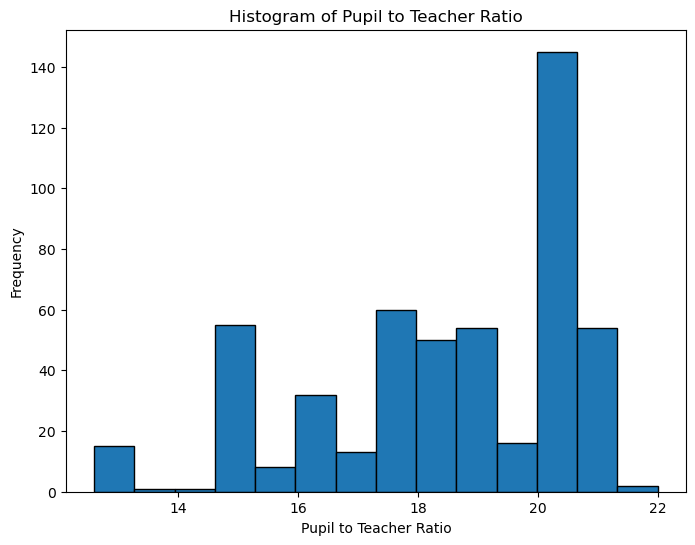

In [18]:
# Histogram
plt.figure(figsize=(8, 6))
plt.hist(boston_df['PTRATIO'], bins='auto', edgecolor='black')
plt.title('Histogram of Pupil to Teacher Ratio')
plt.xlabel('Pupil to Teacher Ratio')
plt.ylabel('Frequency')
plt.show()



Interpretation: The histogram of the pupil to teacher ratio shows a right-skewed distribution with most ratios between 14 and 21. The highest frequency is around 20, indicating it is a common standard. Ratios below 14 and above 21 are rare, highlighting significant variability and resource allocation differences among schools.








### Task 3: Use the appropriate tests to answer the questions provided.


#### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)



In [26]:
from scipy.stats import ttest_ind

# Hypothesis
null_hypothesis = "Null Hypothesis (H0): There is no significant difference in the median value of houses bounded by the Charles river compared to those not bounded by the river."
alternative_hypothesis = "Alternative Hypothesis (H1): There is a significant difference in the median value of houses bounded by the Charles river compared to those not bounded by the river."

# Print Hypotheses
print(null_hypothesis)
print(alternative_hypothesis)

# Separate data for houses bounded and not bounded by Charles river
charles_bounded = boston_df[boston_df['CHAS'] == 1]['MEDV']
not_charles_bounded = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform t-test
t_statistic, p_value = ttest_ind(charles_bounded, not_charles_bounded)

# Print results
print("\nT-test Results:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Determine significance
alpha = 0.05
if p_value < alpha:
    print("Conclusion: Reject the null hypothesis. There is a significant difference in median values of houses bounded by the Charles river and those not bounded.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant difference in median values of houses bounded by the Charles river and those not bounded.")



Null Hypothesis (H0): There is no significant difference in the median value of houses bounded by the Charles river compared to those not bounded by the river.
Alternative Hypothesis (H1): There is a significant difference in the median value of houses bounded by the Charles river compared to those not bounded by the river.

T-test Results:
T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05
Conclusion: Reject the null hypothesis. There is a significant difference in median values of houses bounded by the Charles river and those not bounded.


#### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)



In [27]:
from scipy.stats import f_oneway

# Hypothesis
null_hypothesis = "Null Hypothesis (H0): There is no difference in median values of houses across different age groups of owner-occupied units built prior to 1940."
alternative_hypothesis = "Alternative Hypothesis (H1): There is a difference in median values of houses across different age groups of owner-occupied units built prior to 1940."

# Print Hypotheses
print(null_hypothesis)
print(alternative_hypothesis)

# Create groups based on AGE categories
age_groups = []
age_labels = ['35 years and younger', 'between 35 and 70 years', '70 years and older']
for label in age_labels:
    age_groups.append(boston_df[boston_df['AGE_group'] == label]['MEDV'])

# Perform ANOVA
f_statistic, p_value = f_oneway(*age_groups)

# Print results
print("\nANOVA Results:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Determine significance
alpha = 0.05
if p_value < alpha:
    print("Conclusion: Reject the null hypothesis. There is a difference in median values of houses across different age groups of owner-occupied units built prior to 1940.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no difference in median values of houses across different age groups of owner-occupied units built prior to 1940.")


Null Hypothesis (H0): There is no difference in median values of houses across different age groups of owner-occupied units built prior to 1940.
Alternative Hypothesis (H1): There is a difference in median values of houses across different age groups of owner-occupied units built prior to 1940.

ANOVA Results:
F-statistic: 36.40764999196599
P-value: 1.7105011022702984e-15
Conclusion: Reject the null hypothesis. There is a difference in median values of houses across different age groups of owner-occupied units built prior to 1940.


#### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)



In [28]:
from scipy.stats import pearsonr

# Hypothesis
null_hypothesis = "Null Hypothesis (H0): There is no correlation between Nitric oxide concentrations and proportion of non-retail business acres per town."
alternative_hypothesis = "Alternative Hypothesis (H1): There is a correlation between Nitric oxide concentrations and proportion of non-retail business acres per town."

# Print Hypotheses
print(null_hypothesis)
print(alternative_hypothesis)

# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Print results
print("\nPearson Correlation Results:")
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Determine significance
alpha = 0.05
if p_value < alpha:
    print("Conclusion: Reject the null hypothesis. There is a significant correlation between Nitric oxide concentrations and proportion of non-retail business acres per town.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant correlation between Nitric oxide concentrations and proportion of non-retail business acres per town.")



Null Hypothesis (H0): There is no correlation between Nitric oxide concentrations and proportion of non-retail business acres per town.
Alternative Hypothesis (H1): There is a correlation between Nitric oxide concentrations and proportion of non-retail business acres per town.

Pearson Correlation Results:
Pearson Correlation Coefficient: 0.7636514469209151
P-value: 7.913361061238693e-98
Conclusion: Reject the null hypothesis. There is a significant correlation between Nitric oxide concentrations and proportion of non-retail business acres per town.


#### What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [29]:
import statsmodels.api as sm

# Hypothesis
null_hypothesis = "Null Hypothesis (H0): There is no impact of an additional weighted distance to the Boston employment centres on the median value of owner-occupied homes."
alternative_hypothesis = "Alternative Hypothesis (H1): There is an impact of an additional weighted distance to the Boston employment centres on the median value of owner-occupied homes."

# Print Hypotheses
print(null_hypothesis)
print(alternative_hypothesis)

# Prepare data for regression analysis
X = sm.add_constant(boston_df['DIS'])  # DIS: weighted distances to Boston employment centres
y = boston_df['MEDV']  # MEDV: Median value of owner-occupied homes

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print model summary
print(model.summary())

# Interpretation
alpha = 0.05
p_value = model.pvalues['DIS']

if p_value < alpha:
    print(f"Conclusion: Reject the null hypothesis. There is a significant impact of an additional weighted distance to the Boston employment centres on the median value of owner-occupied homes.")
else:
    print(f"Conclusion: Fail to reject the null hypothesis. There is no significant impact of an additional weighted distance to the Boston employment centres on the median value of owner-occupied homes.")



Null Hypothesis (H0): There is no impact of an additional weighted distance to the Boston employment centres on the median value of owner-occupied homes.
Alternative Hypothesis (H1): There is an impact of an additional weighted distance to the Boston employment centres on the median value of owner-occupied homes.
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 28 Jun 2024   Prob (F-statistic):           1.21e-08
Time:                        21:29:14   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                